In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv('train.csv')
target = data['target']
df = data.iloc[:,2:]
all_zero_l = df.columns[np.where(df_info.loc['zero_rate']==1)]
df = df.drop(all_zero_l,axis=1)
zero_rate = []
target_cor = []
col_var = []
col_unique_num = []
rank_corr = []
rank_corr_p = []
col_missing_value = df.isnull().sum().sum() # the number is 0, which means no missing value
col_var = df.var(axis=0)

for col in df.columns:
    col_unique_num.append(df[col].nunique())
    target_cor.append(data[['target',col]].corr().values[0][1])
    zero_rate.append(len(df[col].iloc[np.where(df[col]==0)])/len(df[col]))
    coef,p = spearmanr(data.target,df[col])
    rank_corr.append(coef)
    rank_corr_p.append(p)
df_info = {'type':df.dtypes,'var':col_var,'unique_number':col_unique_num,'corr':target_cor,'zero_rate':zero_rate,'spearman_corr':rank_corr,'spearman_corr_p':rank_corr_p}
df_info = pd.DataFrame(df_info).T
df_info

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
type,float64,int64,float64,int64,int64,int64,int64,int64,float64,float64,...,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64
var,1.51578e+11,4.13231e+09,3.2486e+11,5.56547e+10,2.29441e+12,3.32997e+11,5.64415e+11,3.53233e+10,9.23556e+13,2.52116e+12,...,1.65489e+13,1.96151e+13,2.03694e+13,4.67781e+13,9.18592e+07,2.22851e+13,2.607e+12,1.86494e+13,2.67647e+12,3.28023e+12
unique_number,32,5,29,3,6,25,6,6,714,56,...,103,119,207,99,2,28,12,17,39,93
corr,0.010188,0.0138048,0.0146944,-0.00291705,0.0166473,-0.0197855,0.00441715,-0.0155383,0.229035,0.021538,...,0.0241441,-0.00867609,0.0414488,0.0234314,-0.0106142,0.0169066,-0.0091775,0.0183496,-0.0168921,-0.0255749
zero_rate,0.991254,0.999103,0.992599,0.999551,0.998879,0.98946,0.998879,0.998879,0.664947,0.972415,...,0.934739,0.958511,0.844584,0.962996,0.999776,0.992151,0.995963,0.992375,0.982059,0.963445
spearman_corr,-0.0911194,0.0114243,0.00163712,0.00839559,0.012453,-0.0413274,0.000845394,-0.0294818,0.0732701,-0.00467682,...,-0.0461709,-0.033835,-0.033887,0.0102949,-0.0218438,-0.01232,-0.00918067,-0.0086655,-0.0207633,-0.028219
spearman_corr_p,1.09065e-09,0.445657,0.912973,0.575156,0.40577,0.00577882,0.954994,0.0490053,9.68776e-07,0.754879,...,0.00204321,0.0238604,0.0236454,0.49191,0.144731,0.410804,0.539951,0.562931,0.165671,0.059539


In [88]:
#check feature correlation with target
df_info = df_info.sort_values(by='corr', ascending=False, axis=1)
high_corr_col = df_info.columns[np.where(df_info.loc['corr']>=0.2)]
df_high_corr = df[high_corr_col]
df_info[high_corr_col].sort_values(by='zero_rate', ascending=False, axis=1)

,150dc0956,482715cbd,dda820122,f81c2f1dd,d47c58fe2,f3cf9341c,cf488d633,ddea5dc65,0d5215715,fa11da6df,...,491b9ee45,1db387535,23310aa6f,70feb1494,6619d81fc,5c6487af1,f190486d6,0572565c2,c47340d97,91f701ba2
type,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
var,8.10557e+12,8.86586e+12,9.84002e+12,1.07147e+13,7.13364e+12,7.31411e+12,1.57731e+13,1.74587e+13,7.26769e+12,7.63972e+12,...,9.38387e+13,8.85647e+13,9.21694e+13,6.38357e+13,9.21608e+13,8.34105e+13,7.93295e+13,9.29112e+13,9.29542e+13,9.35841e+13
unique_number,69,58,55,66,205,216,197,178,215,215,...,591,562,591,582,564,631,765,530,531,548
corr,0.203817,0.207797,0.212569,0.210881,0.213259,0.252583,0.232959,0.233519,0.248703,0.205299,...,0.213769,0.207491,0.201988,0.248898,0.200045,0.209962,0.263821,0.201068,0.213456,0.206891
zero_rate,0.965239,0.963669,0.962996,0.961202,0.929356,0.927786,0.927562,0.927114,0.927114,0.926889,...,0.658444,0.657995,0.656425,0.656425,0.656201,0.654855,0.653734,0.653061,0.651267,0.650146
spearman_corr,0.0396267,0.0368996,0.0549678,0.0481663,0.0420168,0.0659993,0.0511323,0.0744786,0.0532096,0.0357891,...,0.0323363,0.00646607,0.0333862,0.0368901,0.026735,0.02121,0.107678,0.013543,0.020268,0.0238858
spearman_corr_p,0.00813532,0.013734,0.00024041,0.00129401,0.00501367,1.03026e-05,0.000636246,6.39519e-07,0.000378505,0.0168511,...,0.0308316,0.665988,0.0257885,0.0137582,0.0742498,0.156754,5.62561e-13,0.365926,0.176,0.110763


130 130


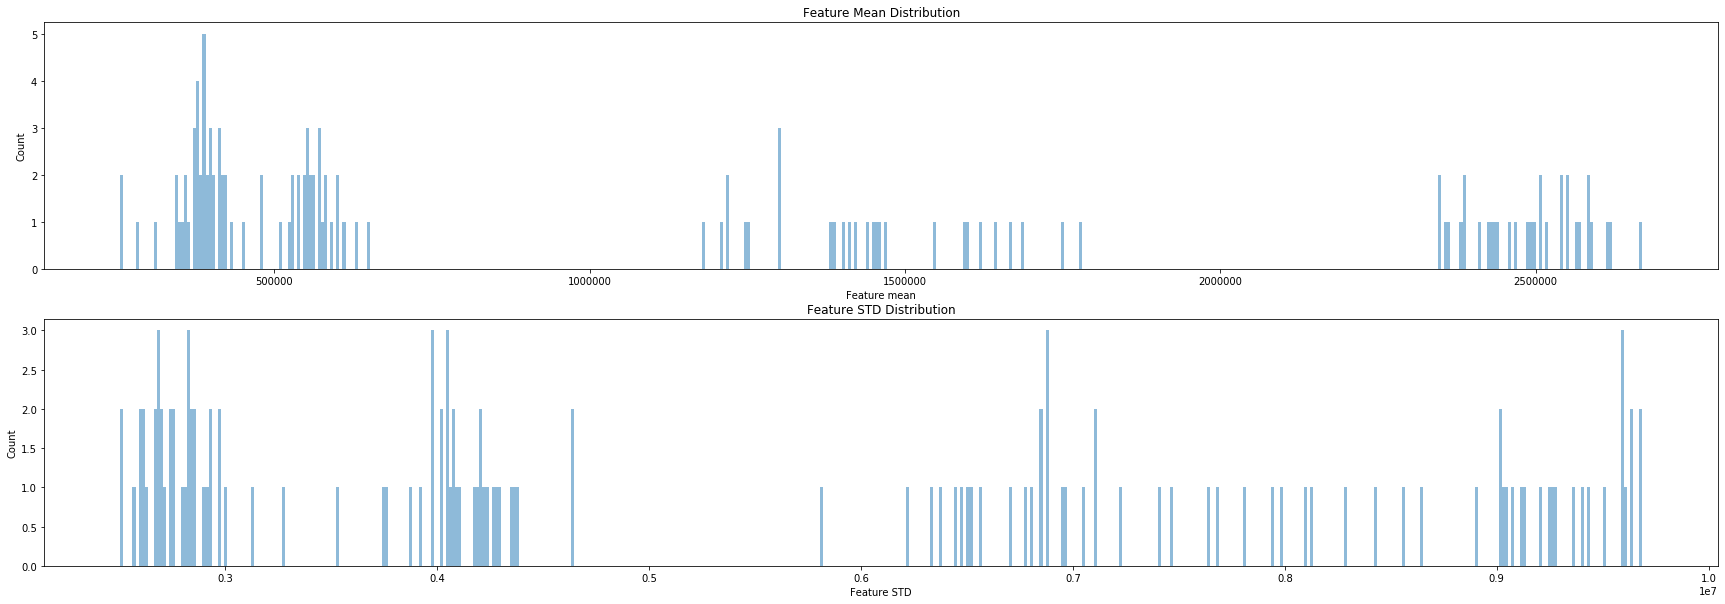

In [70]:
#plot feature mean and std
f_mean = []
f_std = []
for col in df_high_corr:
    f_mean.append(np.mean(df_high_corr[col]))
    f_std.append(np.std(df_high_corr[col]))
print(len(f_mean),len(f_std))    

plt.figure(figsize=(30, 10))
plt.subplot(2, 1, 1)
plt.hist(f_mean,bins=500, alpha = 0.5, histtype='bar') # Feature mean roughly has three clusters
plt.xlabel('Feature mean')
plt.ylabel('Count')
plt.title('Feature Mean Distribution')
plt.subplot(2, 1, 2)
plt.hist(f_std,bins=500, alpha = 0.5, histtype='bar') # Feature mean roughly has three clusters
plt.xlabel('Feature STD')
plt.ylabel('Count')
plt.title('Feature STD Distribution')
plt.show()

In [33]:
#check feature spearman correlation with target
df_info = df_info.sort_values(by='spearman_corr_p', ascending=True, axis=1,na_position='last')
spearman_corr_col = df_info.columns[np.where((df_info.loc['spearman_corr_p'] < 0.05) & (df_info.loc['spearman_corr'] >= 0.05))]
df_spearman_corr_col = df[spearman_corr_col]
#df_info[spearman_corr_col].sort_values(by='zero_rate', ascending=True, axis=1,na_position='last')
df_spearman_corr_col

,f190486d6,58e2e02e6,9fd594eec,e1d0e11b5,0d51722ca,63c094ba4,1c71183bb,20aa07010,122c135ed,87ffda550,...,994b946ad,ba136ae3f,cf488d633,a459b5f7d,8479174c2,7121c40ee,ca2b906e8,097c7841e,6192f193d,ea4887e6b
0,1866666.66,12066666.66,600000.0,0.0,0.0,7100000.0,600000.0,0.0,28000000.0,1300000.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,2850000.00,1800000.0,0.0,0.0,0.0,0.0,2200000.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000000.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,0.00,680000.00,300000.0,0.0,70000.0,0.0,0.0,70000.0,607000.0,0.0,...,0.0,0.0,0.0,6000000,0.0,0.0,0.0,0.0,0.0,3200000.0
4455,242666.66,0.00,0.0,0.0,0.0,0.0,0.0,375000.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4456,0.00,4640000.00,0.0,0.0,0.0,4640000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4457,200000.00,0.00,1900000.0,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


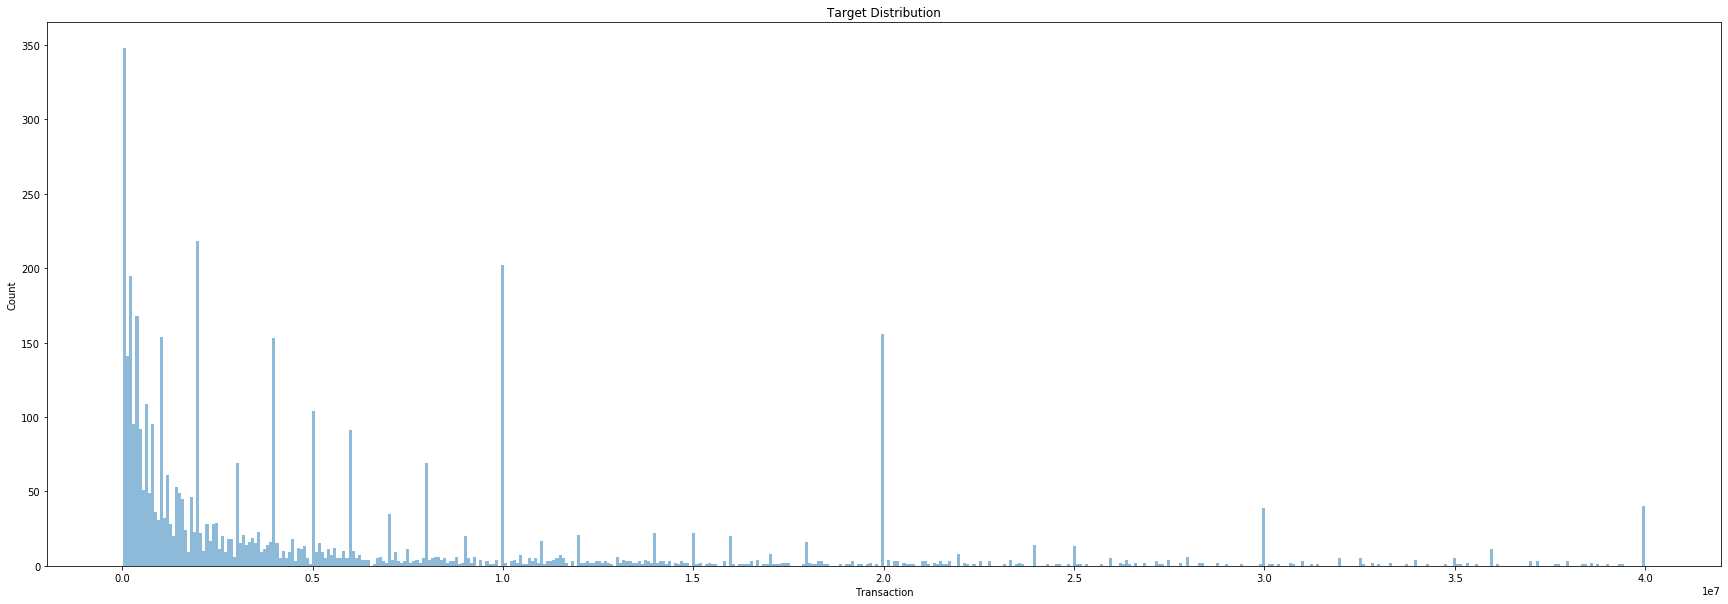

In [34]:
#check Target Distribution
plt.figure(figsize=(30, 10))
plt.hist(data.target,bins=500, alpha = 0.5, histtype='bar') # Transactions tend to in X0000 (int)
plt.xlabel('Transaction')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [82]:
#Standardlize feature and target
X_train = StandardScaler().fit_transform(df.values)
# Implement PCA with 95% explained
pca = PCA(.95)
principalComponents = pca.fit_transform(X_train) # 1500 components neeeded
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,-3.327097,1.071720,-0.505696,0.125557,-0.092449,-0.449914,-0.508446,0.566449,-0.007459,-0.196502,...,0.401690,0.435920,0.139346,-0.370081,0.221566,0.430217,-0.028955,-0.123822,-0.203139,0.145791
1,-3.597999,0.435743,-0.458868,-1.488789,-0.577743,-0.687771,-0.774354,-0.545684,0.071342,-0.345100,...,-0.328786,0.412031,0.816549,-0.674187,0.594030,-0.044733,-0.039091,0.315651,0.726429,0.059278
2,-4.651081,0.194855,-0.837559,-1.110827,-0.620798,-0.781996,-0.742969,0.053920,-0.306811,-0.469370,...,0.127048,0.200042,0.041195,0.047570,-0.086854,0.122548,0.077182,0.052001,-0.026511,0.012786
3,-4.867268,0.003829,-0.785960,-1.156502,-0.640020,-0.805242,-0.743776,-0.035313,-0.310016,-0.509182,...,0.026822,0.158231,0.108974,0.054309,0.015295,-0.018636,-0.016366,0.085004,0.043869,-0.013131
4,-4.259783,0.609890,-0.866095,-1.065984,-0.471177,-0.698608,-0.721528,-0.003797,-0.281764,-0.517122,...,-0.346342,0.323127,-0.016272,0.026743,0.052574,0.023316,0.144181,0.122506,0.130662,-0.161627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,-3.760540,0.594370,-0.758344,-1.623637,-0.793402,-0.687469,-0.457887,1.004922,-0.271203,-0.198488,...,-0.021362,0.053530,-0.198239,0.229083,-0.009919,0.052793,0.563491,0.097377,-0.262993,-0.105446
4455,-4.838131,0.044665,-0.860349,-1.301367,-0.723560,-0.812091,-0.728811,0.024985,-0.311408,-0.526364,...,0.019105,0.018013,-0.022064,-0.024856,-0.001009,0.000812,-0.001136,0.027117,-0.038031,-0.007964
4456,0.635468,4.455067,1.370018,-1.482387,0.674044,-0.277572,-0.651836,2.039473,0.319608,0.550509,...,0.151189,-0.457829,0.245917,-0.149157,0.262840,-0.124924,-0.241305,-0.334773,-0.182726,0.103743
4457,-4.618531,0.309377,-0.889131,-1.323928,-0.774468,-0.814846,-0.678727,0.090129,-0.321756,-0.553168,...,-0.135930,0.059876,0.087324,-0.153330,-0.074882,-0.195225,0.002722,0.057238,-0.091061,-0.059560


In [86]:
#Implement PCA with 95% explained only on high_corr_feature
pca_high_corr = PCA(.95)
principalComponents_high_corr = pca_high_corr.fit_transform(StandardScaler().fit_transform(df_high_corr.values)) # 90 components neeeded,compared to 130 original
principalDf_high_corr = pd.DataFrame(data = principalComponents_high_corr)
principalDf_high_corr

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-0.514232,0.451125,-0.486671,0.834156,0.123279,-0.486798,-0.674995,0.556585,-0.328751,0.480285,...,0.018447,0.198304,-0.044748,-0.191839,-0.025595,0.034797,-0.291975,0.137598,-0.305149,0.127556
1,-1.009857,-1.111056,-0.554626,0.421928,-0.497246,0.157066,0.582546,-0.729961,-0.725955,0.795543,...,-0.470186,-0.807753,-0.512636,-0.306008,-0.795001,-0.414748,0.127296,-0.450205,-0.509072,0.455437
2,-1.684030,-0.135437,-0.022832,0.092520,-0.445670,0.067796,0.078047,0.184821,-0.070758,0.252165,...,-0.268515,-0.195775,0.289476,0.494925,-0.172982,-0.502159,-0.173355,0.202872,-0.409910,-0.027562
3,-2.060938,-0.577842,-0.153609,-0.205357,-0.086247,0.070570,0.278042,-0.021172,-0.210607,-0.003644,...,0.005651,-0.004449,0.007145,0.001424,0.009129,0.007920,0.028237,0.010867,-0.003236,0.017894
4,-1.529385,-0.300360,-0.333075,0.103724,0.326042,-0.038670,-0.675554,-0.368660,0.432754,-0.549225,...,-0.110139,0.107938,-0.383752,-0.084693,-0.114064,-0.011690,0.084983,0.086883,-0.131319,0.167725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,-1.519523,-0.785343,-0.534706,0.234579,-0.183598,0.188098,0.203131,-0.206707,-0.308613,-0.024430,...,-0.117733,-0.007253,-0.205889,-0.039949,-0.208735,-0.139567,0.180113,0.211437,0.266177,-0.083670
4455,-1.948113,-0.475686,-0.146274,-0.200462,-0.110213,0.060156,0.214939,0.082327,-0.142581,0.060279,...,-0.006451,0.013428,0.009829,-0.003448,0.005510,0.002137,0.026508,0.009579,-0.004207,0.006989
4456,1.846904,4.125888,2.697520,-1.682270,1.085181,0.579015,0.156957,-0.990824,2.551093,2.095614,...,-0.220403,1.405781,-0.410064,1.292657,-0.151861,-0.055955,1.102300,0.693541,0.991700,-0.294507
4457,-1.690874,-0.241177,-0.079691,-0.340088,-0.131463,0.036443,0.065359,0.251607,0.010185,0.157298,...,-0.033670,0.041372,0.038468,-0.083929,-0.000391,-0.041618,-0.046089,0.035307,0.017339,0.036792


In [92]:
df_high_corr.corr()


,9fd594eec,5bc7ab64f,cbbc9c431,f190486d6,6b119d8ce,f74e8f13d,ac30af84a,26fc93eb7,58e2e02e6,429687d5a,...,58e056e12,150dc0956,703885424,f02ecb19c,23310aa6f,122c135ed,ba136ae3f,0572565c2,d7d314edc,6619d81fc
9fd594eec,1.000000,0.328514,0.371844,0.288258,0.359766,0.345015,0.342120,0.328345,0.248266,0.306718,...,0.295572,0.277452,0.299215,0.304553,0.290681,0.282473,0.235138,0.295648,0.253401,0.298014
5bc7ab64f,0.328514,1.000000,0.570442,0.318888,0.527333,0.435361,0.502011,0.436779,0.279106,0.554377,...,0.293848,0.431555,0.383504,0.361353,0.338128,0.346452,0.322368,0.345820,0.371437,0.353117
cbbc9c431,0.371844,0.570442,1.000000,0.317139,0.624145,0.436432,0.597844,0.407673,0.308360,0.504754,...,0.346381,0.424595,0.367751,0.386594,0.372684,0.372537,0.387710,0.384934,0.331333,0.388467
f190486d6,0.288258,0.318888,0.317139,1.000000,0.308018,0.231576,0.280100,0.278429,0.242988,0.349440,...,0.214752,0.222479,0.216099,0.236885,0.220857,0.212600,0.209503,0.210664,0.195100,0.254479
6b119d8ce,0.359766,0.527333,0.624145,0.308018,1.000000,0.450927,0.552824,0.414683,0.298668,0.469731,...,0.339706,0.413584,0.373867,0.393291,0.364047,0.327390,0.332331,0.381863,0.342001,0.377848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122c135ed,0.282473,0.346452,0.372537,0.212600,0.327390,0.397779,0.329231,0.393052,0.196145,0.313265,...,0.273377,0.281400,0.327322,0.387469,0.307142,1.000000,0.187577,0.334054,0.208125,0.350607
ba136ae3f,0.235138,0.322368,0.387710,0.209503,0.332331,0.302523,0.307087,0.295351,0.180685,0.445741,...,0.203899,0.157627,0.268530,0.250069,0.266101,0.187577,1.000000,0.364067,0.145508,0.286626
0572565c2,0.295648,0.345820,0.384934,0.210664,0.381863,0.466716,0.334732,0.510943,0.211512,0.308449,...,0.307423,0.284316,0.456491,0.597196,0.499100,0.334054,0.364067,1.000000,0.249031,0.524231
d7d314edc,0.253401,0.371437,0.331333,0.195100,0.342001,0.326813,0.287662,0.347056,0.200152,0.238946,...,0.236294,0.296007,0.277629,0.244489,0.248949,0.208125,0.145508,0.249031,1.000000,0.271644


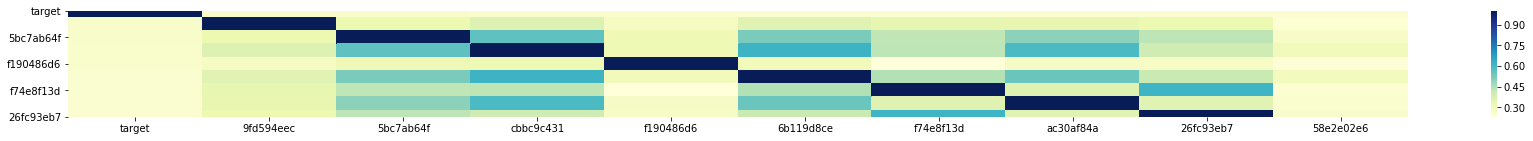

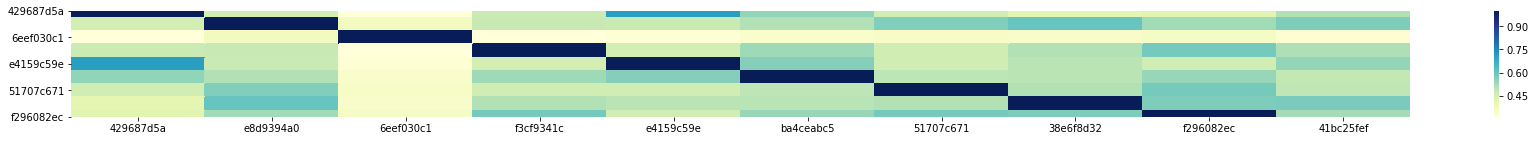

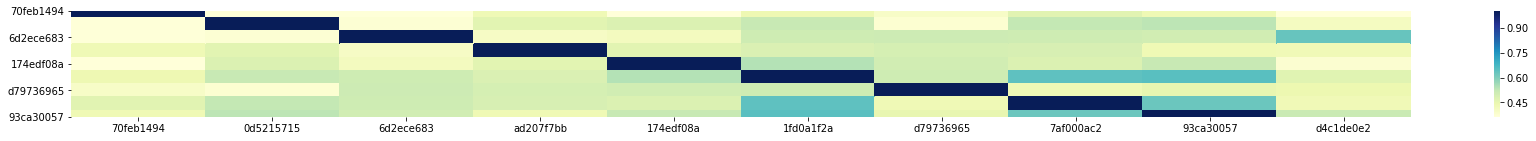

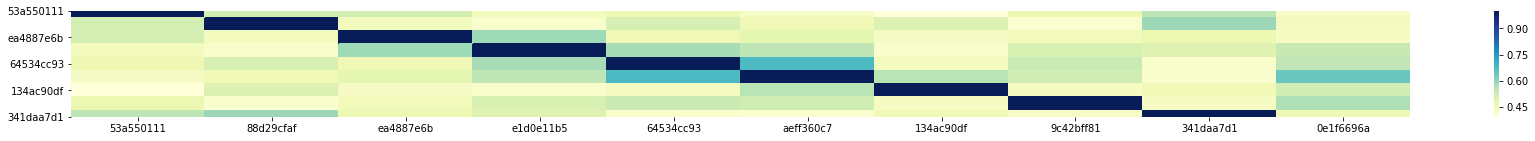

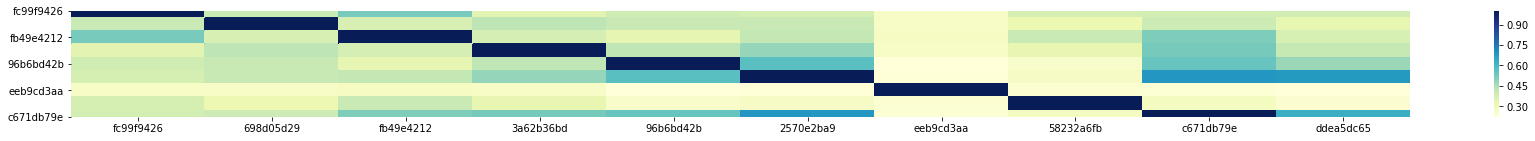

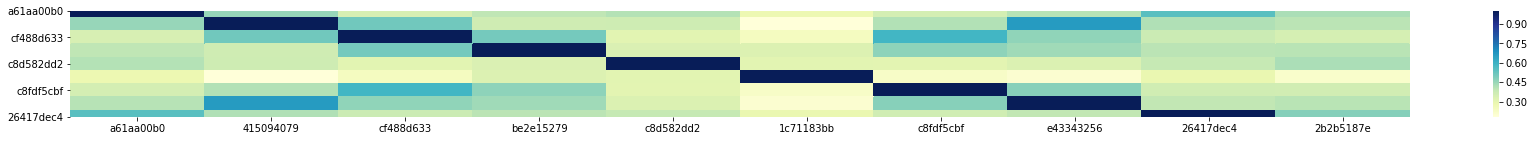

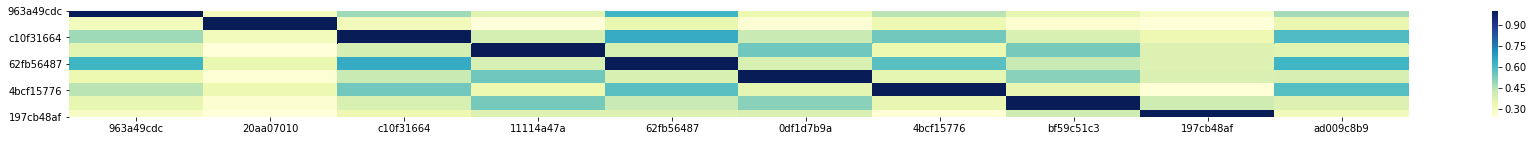

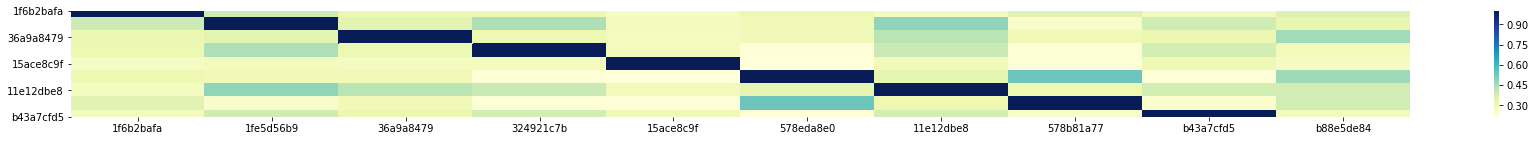

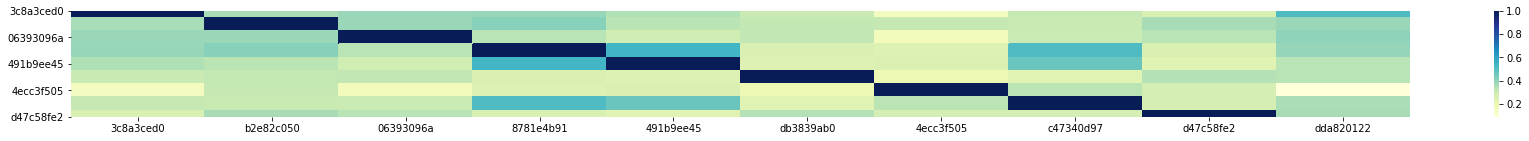

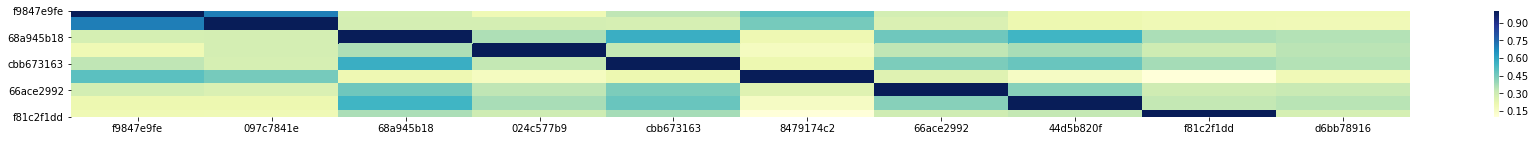

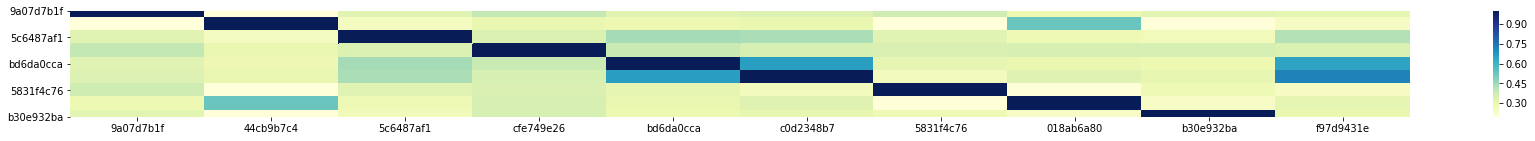

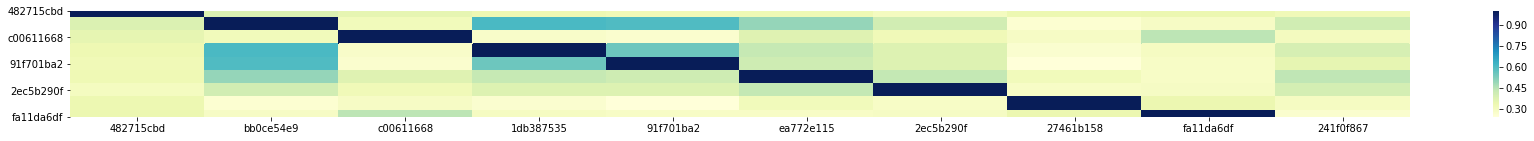

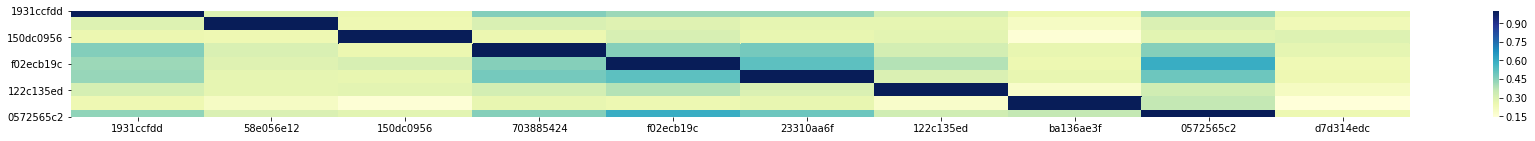

In [93]:
data_heatmap = data[['target'] + high_corr_col.values.tolist()].corr()
for i in range(int(len(high_corr_col)/10)):
    plt.figure(figsize=(30, 30))
    plt.subplot(int(len(high_corr_col)/10), 1, i+1)
    sns.heatmap(data_heatmap.iloc[10*i:10+10*i,10*i:10+10*i],cmap="YlGnBu")
plt.show()